# Gather

In [175]:
#importação das bibliotecas
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt 
import tweepy
import json
import time as tm
from datetime import datetime
import re
%matplotlib inline
from matplotlib.ticker import FuncFormatter


In [ ]:
#chaves e confguração da api do tweeter tweepy
consumer_key = 
consumer_secret = 
access_token =
access_secret = 


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [3]:
#lendo o arquivo twitter-archive-enhanced.csv baixado manualmente do site da udacity
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#Baixando e lendo o arquivo image-predictions.tsv baixado programaticamente por meio do módulo request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
if not os.path.isfile(url.split('/')[-1]):
    with open(url.split('/')[-1],'wb') as file:
        file.write(response.content)
else:
    print('File exists')
    
df_image_predictions = pd.read_table('image-predictions.tsv', sep = '\t')

File exists


In [8]:
#coletando programaticamente a contagem de retweet e favorite dos tweets por meio da tweepy
df_list = []
df_list_notfound = []
time = 0
for index, tweet_id in enumerate(df_tweets.tweet_id[:]):
    try:
        start_time = tm.time()
        tweet = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, tweet_mode='extended')
        contents = {'tweet_id': tweet_id,
                    'retweet_count': tweet.retweet_count,
                    'favorite_count': tweet.favorite_count}
        df_list.append(contents)
        final_time = tm.time()
        time = ((final_time - start_time)/60)
        print('{0} - {1} - {2:.5f} min'.format(index+1, tweet_id, time))
    except Exception as e:
        df_list_notfound.append(tweet_id)
        print('ID not found')

1 - 892420643555336193 - 0.00405 min
2 - 892177421306343426 - 0.00384 min
3 - 891815181378084864 - 0.00391 min
4 - 891689557279858688 - 0.00426 min
5 - 891327558926688256 - 0.00431 min
6 - 891087950875897856 - 0.00384 min
7 - 890971913173991426 - 0.00404 min
8 - 890729181411237888 - 0.00416 min
9 - 890609185150312448 - 0.00411 min
10 - 890240255349198849 - 0.00381 min
11 - 890006608113172480 - 0.00402 min
12 - 889880896479866881 - 0.00420 min
13 - 889665388333682689 - 0.00412 min
14 - 889638837579907072 - 0.00409 min
15 - 889531135344209921 - 0.00399 min
16 - 889278841981685760 - 0.00414 min
17 - 888917238123831296 - 0.00395 min
18 - 888804989199671297 - 0.00406 min
19 - 888554962724278272 - 0.00391 min
ID not found
21 - 888078434458587136 - 0.00387 min
22 - 887705289381826560 - 0.00465 min
23 - 887517139158093824 - 0.00407 min
24 - 887473957103951883 - 0.00382 min
25 - 887343217045368832 - 0.00399 min
26 - 887101392804085760 - 0.00405 min
27 - 886983233522544640 - 0.00427 min
28 - 886

218 - 850380195714523136 - 0.00388 min
219 - 850333567704068097 - 0.00401 min
220 - 850145622816686080 - 0.00400 min
221 - 850019790995546112 - 0.00413 min
222 - 849776966551130114 - 0.00379 min
223 - 849668094696017920 - 0.00391 min
224 - 849412302885593088 - 0.00410 min
225 - 849336543269576704 - 0.00421 min
226 - 849051919805034497 - 0.00473 min
227 - 848690551926992896 - 0.00441 min
228 - 848324959059550208 - 0.00402 min
229 - 848213670039564288 - 0.00430 min
230 - 848212111729840128 - 0.00380 min
231 - 847978865427394560 - 0.00418 min
232 - 847971574464610304 - 0.00397 min
233 - 847962785489326080 - 0.00402 min
234 - 847842811428974592 - 0.00384 min
235 - 847617282490613760 - 0.00399 min
236 - 847606175596138505 - 0.00393 min
237 - 847251039262605312 - 0.00405 min
238 - 847157206088847362 - 0.00418 min
239 - 847116187444137987 - 0.00423 min
240 - 846874817362120707 - 0.00410 min
241 - 846514051647705089 - 0.00396 min
242 - 846505985330044928 - 0.00405 min
243 - 846153765933735936 

431 - 821044531881721856 - 0.00410 min
432 - 820837357901512704 - 0.00391 min
433 - 820749716845686786 - 0.00379 min
434 - 820690176645140481 - 0.00425 min
435 - 820494788566847489 - 0.00410 min
436 - 820446719150292993 - 0.00385 min
437 - 820314633777061888 - 0.00430 min
438 - 820078625395449857 - 0.00588 min
439 - 820013781606658049 - 0.00381 min
440 - 819952236453363712 - 0.00393 min
441 - 819924195358416896 - 0.00393 min
442 - 819711362133872643 - 0.00503 min
443 - 819588359383371776 - 0.00398 min
444 - 819347104292290561 - 0.00444 min
445 - 819238181065359361 - 0.00425 min
446 - 819227688460238848 - 0.00378 min
447 - 819015337530290176 - 0.00420 min
448 - 819015331746349057 - 0.00413 min
449 - 819006400881917954 - 0.00381 min
450 - 819004803107983360 - 0.00405 min
451 - 818646164899774465 - 0.00388 min
452 - 818627210458333184 - 0.00458 min
453 - 818614493328580609 - 0.00400 min
454 - 818588835076603904 - 0.00423 min
455 - 818536468981415936 - 0.00417 min
456 - 818307523543449600 

643 - 793210959003287553 - 0.00401 min
644 - 793195938047070209 - 0.00395 min
645 - 793180763617361921 - 0.00384 min
646 - 793165685325201412 - 0.00396 min
647 - 793150605191548928 - 0.00406 min
648 - 793135492858580992 - 0.00393 min
649 - 793120401413079041 - 0.00391 min
650 - 792913359805018113 - 0.00405 min
651 - 792883833364439040 - 0.00393 min
652 - 792773781206999040 - 0.00447 min
653 - 792394556390137856 - 0.00381 min
654 - 792050063153438720 - 0.00391 min
655 - 791821351946420224 - 0.00440 min
656 - 791784077045166082 - 0.00396 min
657 - 791780927877898241 - 0.00415 min
658 - 791774931465953280 - 0.00398 min
659 - 791672322847637504 - 0.00379 min
660 - 791406955684368384 - 0.00400 min
661 - 791312159183634433 - 0.00424 min
662 - 791026214425268224 - 0.00411 min
663 - 790987426131050500 - 0.00405 min
664 - 790946055508652032 - 0.00406 min
665 - 790723298204217344 - 0.00425 min
666 - 790698755171364864 - 0.00405 min
667 - 790581949425475584 - 0.00395 min
668 - 790337589677002753 

855 - 765222098633691136 - 0.00390 min
856 - 764857477905154048 - 0.00546 min
857 - 764259802650378240 - 0.00423 min
858 - 763956972077010945 - 0.00400 min
859 - 763837565564780549 - 0.00387 min
860 - 763183847194451968 - 0.00398 min
861 - 763167063695355904 - 0.00430 min
862 - 763103485927849985 - 0.00423 min
863 - 762699858130116608 - 0.00403 min
864 - 762471784394268675 - 0.00388 min
865 - 762464539388485633 - 0.00404 min
866 - 762316489655476224 - 0.00416 min
867 - 762035686371364864 - 0.00415 min
868 - 761976711479193600 - 0.00424 min
869 - 761750502866649088 - 0.00410 min
870 - 761745352076779520 - 0.00406 min
871 - 761672994376806400 - 0.00385 min
872 - 761599872357261312 - 0.00406 min
873 - 761371037149827077 - 0.00406 min
874 - 761334018830917632 - 0.00419 min
875 - 761292947749015552 - 0.00384 min
876 - 761227390836215808 - 0.00385 min
877 - 761004547850530816 - 0.00433 min
878 - 760893934457552897 - 0.00493 min
879 - 760656994973933572 - 0.00401 min
880 - 760641137271070720 

Rate limit reached. Sleeping for: 676


901 - 758740312047005698 - 11.35709 min
902 - 758474966123810816 - 0.00426 min
903 - 758467244762497024 - 0.00411 min
904 - 758405701903519748 - 0.00410 min
905 - 758355060040593408 - 0.00405 min
906 - 758099635764359168 - 0.00384 min
907 - 758041019896193024 - 0.00398 min
908 - 757741869644341248 - 0.00397 min
909 - 757729163776290825 - 0.00432 min
910 - 757725642876129280 - 0.00415 min
911 - 757611664640446465 - 0.00410 min
912 - 757597904299253760 - 0.00414 min
913 - 757596066325864448 - 0.00396 min
914 - 757400162377592832 - 0.00412 min
915 - 757393109802180609 - 0.00388 min
916 - 757354760399941633 - 0.00406 min
917 - 756998049151549440 - 0.00427 min
918 - 756939218950160384 - 0.00398 min
919 - 756651752796094464 - 0.00399 min
920 - 756526248105566208 - 0.00387 min
921 - 756303284449767430 - 0.00392 min
922 - 756288534030475264 - 0.00416 min
923 - 756275833623502848 - 0.00392 min
924 - 755955933503782912 - 0.00405 min
925 - 755206590534418437 - 0.00412 min
926 - 755110668769038337

1109 - 734559631394082816 - 0.00403 min
1110 - 733828123016450049 - 0.00400 min
1111 - 733822306246479872 - 0.00396 min
1112 - 733482008106668032 - 0.00400 min
1113 - 733460102733135873 - 0.00405 min
1114 - 733109485275860992 - 0.00410 min
1115 - 732732193018155009 - 0.00394 min
1116 - 732726085725589504 - 0.00428 min
1117 - 732585889486888962 - 0.00424 min
1118 - 732375214819057664 - 0.00401 min
1119 - 732005617171337216 - 0.00424 min
1120 - 731285275100512256 - 0.00393 min
1121 - 731156023742988288 - 0.00411 min
1122 - 730924654643314689 - 0.00403 min
1123 - 730573383004487680 - 0.00408 min
1124 - 730427201120833536 - 0.00440 min
1125 - 730211855403241472 - 0.00407 min
1126 - 730196704625098752 - 0.00391 min
1127 - 729854734790754305 - 0.00396 min
1128 - 729838605770891264 - 0.00398 min
1129 - 729823566028484608 - 0.00387 min
1130 - 729463711119904772 - 0.00399 min
1131 - 729113531270991872 - 0.00400 min
1132 - 728986383096946689 - 0.00392 min
1133 - 728760639972315136 - 0.00418 min


1314 - 706904523814649856 - 0.00424 min
1315 - 706901761596989440 - 0.00415 min
1316 - 706681918348251136 - 0.00416 min
1317 - 706644897839910912 - 0.00392 min
1318 - 706593038911545345 - 0.00413 min
1319 - 706538006853918722 - 0.00406 min
1320 - 706516534877929472 - 0.00400 min
1321 - 706346369204748288 - 0.00397 min
1322 - 706310011488698368 - 0.00401 min
1323 - 706291001778950144 - 0.00392 min
1324 - 706265994973601792 - 0.00420 min
1325 - 706169069255446529 - 0.00419 min
1326 - 706166467411222528 - 0.00397 min
1327 - 706153300320784384 - 0.00403 min
1328 - 705975130514706432 - 0.00414 min
1329 - 705970349788291072 - 0.00399 min
1330 - 705898680587526145 - 0.00400 min
1331 - 705786532653883392 - 0.00378 min
1332 - 705591895322394625 - 0.00428 min
1333 - 705475953783398401 - 0.00405 min
1334 - 705442520700944385 - 0.00399 min
1335 - 705428427625635840 - 0.00410 min
1336 - 705239209544720384 - 0.00405 min
1337 - 705223444686888960 - 0.00441 min
1338 - 705102439679201280 - 0.00390 min


1519 - 690932576555528194 - 0.00430 min
1520 - 690735892932222976 - 0.00394 min
1521 - 690728923253055490 - 0.00405 min
1522 - 690690673629138944 - 0.00382 min
1523 - 690649993829576704 - 0.00391 min
1524 - 690607260360429569 - 0.00402 min
1525 - 690597161306841088 - 0.00455 min
1526 - 690400367696297985 - 0.00428 min
1527 - 690374419777196032 - 0.00403 min
1528 - 690360449368465409 - 0.00401 min
1529 - 690348396616552449 - 0.00408 min
1530 - 690248561355657216 - 0.00400 min
1531 - 690021994562220032 - 0.00382 min
1532 - 690015576308211712 - 0.00420 min
1533 - 690005060500217858 - 0.00422 min
1534 - 689999384604450816 - 0.00390 min
1535 - 689993469801164801 - 0.00399 min
1536 - 689977555533848577 - 0.00416 min
1537 - 689905486972461056 - 0.00402 min
1538 - 689877686181715968 - 0.00429 min
1539 - 689835978131935233 - 0.00435 min
1540 - 689661964914655233 - 0.00408 min
1541 - 689659372465688576 - 0.00396 min
1542 - 689623661272240129 - 0.00407 min
1543 - 689599056876867584 - 0.00393 min


1724 - 680100725817409536 - 0.00396 min
1725 - 680085611152338944 - 0.00440 min
1726 - 680070545539371008 - 0.00413 min
ID not found
1728 - 679877062409191424 - 0.00405 min
1729 - 679872969355714560 - 0.00387 min
1730 - 679862121895714818 - 0.00422 min
1731 - 679854723806179328 - 0.00414 min
1732 - 679844490799091713 - 0.00388 min
1733 - 679828447187857408 - 0.00395 min
1734 - 679777920601223168 - 0.00473 min
1735 - 679736210798047232 - 0.00424 min
1736 - 679729593985699840 - 0.00394 min
1737 - 679722016581222400 - 0.00399 min
1738 - 679530280114372609 - 0.00433 min
1739 - 679527802031484928 - 0.00388 min
1740 - 679511351870550016 - 0.00385 min
1741 - 679503373272485890 - 0.00405 min
1742 - 679475951516934144 - 0.00439 min
1743 - 679462823135686656 - 0.00404 min
1744 - 679405845277462528 - 0.00396 min
1745 - 679158373988876288 - 0.00399 min
1746 - 679148763231985668 - 0.00394 min
1747 - 679132435750195208 - 0.00382 min
1748 - 679111216690831360 - 0.00417 min
1749 - 679062614270468097 -

Rate limit reached. Sleeping for: 676


1801 - 676975532580409345 - 11.35785 min
1802 - 676957860086095872 - 0.00388 min
1803 - 676949632774234114 - 0.00415 min
1804 - 676948236477857792 - 0.00401 min
1805 - 676946864479084545 - 0.00391 min
1806 - 676942428000112642 - 0.00437 min
1807 - 676936541936185344 - 0.00405 min
1808 - 676916996760600576 - 0.00406 min
1809 - 676897532954456065 - 0.00415 min
1810 - 676864501615042560 - 0.00395 min
1811 - 676821958043033607 - 0.00409 min
1812 - 676819651066732545 - 0.00403 min
1813 - 676811746707918848 - 0.00403 min
1814 - 676776431406465024 - 0.00428 min
1815 - 676617503762681856 - 0.00506 min
1816 - 676613908052996102 - 0.00405 min
1817 - 676606785097199616 - 0.00408 min
1818 - 676603393314578432 - 0.00515 min
1819 - 676593408224403456 - 0.00420 min
1820 - 676590572941893632 - 0.00435 min
1821 - 676588346097852417 - 0.00411 min
1822 - 676582956622721024 - 0.00435 min
1823 - 676575501977128964 - 0.00390 min
1824 - 676533798876651520 - 0.00417 min
1825 - 676496375194980353 - 0.00392 min

2006 - 672272411274932228 - 0.00398 min
2007 - 672267570918129665 - 0.00398 min
2008 - 672264251789176834 - 0.00381 min
2009 - 672256522047614977 - 0.00396 min
2010 - 672254177670729728 - 0.00395 min
2011 - 672248013293752320 - 0.00391 min
2012 - 672245253877968896 - 0.00454 min
2013 - 672239279297454080 - 0.00400 min
2014 - 672231046314901505 - 0.00392 min
2015 - 672222792075620352 - 0.00423 min
2016 - 672205392827572224 - 0.00391 min
2017 - 672169685991993344 - 0.00388 min
2018 - 672160042234327040 - 0.00399 min
2019 - 672139350159835138 - 0.00394 min
2020 - 672125275208069120 - 0.00400 min
2021 - 672095186491711488 - 0.00392 min
2022 - 672082170312290304 - 0.00429 min
2023 - 672068090318987265 - 0.00404 min
2024 - 671896809300709376 - 0.00411 min
2025 - 671891728106971137 - 0.00395 min
2026 - 671882082306625538 - 0.00412 min
2027 - 671879137494245376 - 0.00393 min
2028 - 671874878652489728 - 0.00419 min
2029 - 671866342182637568 - 0.00427 min
2030 - 671855973984772097 - 0.00445 min


2211 - 668620235289837568 - 0.00422 min
2212 - 668614819948453888 - 0.00402 min
2213 - 668587383441514497 - 0.00404 min
2214 - 668567822092664832 - 0.00405 min
2215 - 668544745690562560 - 0.00391 min
2216 - 668542336805281792 - 0.00405 min
2217 - 668537837512433665 - 0.00409 min
2218 - 668528771708952576 - 0.00417 min
2219 - 668507509523615744 - 0.00430 min
2220 - 668496999348633600 - 0.00424 min
2221 - 668484198282485761 - 0.00438 min
2222 - 668480044826800133 - 0.00408 min
2223 - 668466899341221888 - 0.00388 min
2224 - 668297328638447616 - 0.00418 min
2225 - 668291999406125056 - 0.00410 min
2226 - 668286279830867968 - 0.00406 min
2227 - 668274247790391296 - 0.00393 min
2228 - 668268907921326080 - 0.00402 min
2229 - 668256321989451776 - 0.00418 min
2230 - 668248472370458624 - 0.00395 min
2231 - 668237644992782336 - 0.00420 min
2232 - 668226093875376128 - 0.00387 min
2233 - 668221241640230912 - 0.00381 min
2234 - 668204964695683073 - 0.00394 min
2235 - 668190681446379520 - 0.00395 min


In [5]:
#salvando os dados em tweet_json.txt
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as file:
        for dic in df_list:
            tweet_json = json.dumps(dic)
            file.write(tweet_json+'\n')
else:
    print('File exists')

File exists


In [6]:
#lendo 'tweet_json.txt'
with open('tweet_json.txt') as jf:
    json_list = [json.loads(line.rstrip('\n')) for line in jf]    
    df_count = pd.DataFrame(json_list)

In [7]:
df_count.to_csv('tweet_count.csv', sep=',', index=False)

# Assess

In [8]:
df_tweets.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [9]:
df_image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [10]:
df_count.head(3)

,favorite_count,retweet_count,tweet_id
0,37986,8302,892420643555336193
1,32620,6134,892177421306343426
2,24551,4059,891815181378084864


In [773]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [774]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [775]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
tweet_id          2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [173]:
#df_image_predictions.p3.value_counts()

In [162]:
#df_tweets.rating_denominator.value_counts()
#df_tweets.rating_numerator.value_counts()

In [174]:
#df_tweets[df_tweets.rating_denominator != 10]
#sum(df_tweets.rating_numerator.isnull())

In [175]:
#df_tweets.name.value_counts()

## Quality

- retweets
- Cachorros com mais de um estágio  (doggo, floofer, pupper ou puppo)
- p1 sem padrão minúsculo ou maiúsculo 
- p2 sem padrão minúsculo ou maiúsculo 
- p3 sem padrão minúsculo ou maiúsculo 
- rating_denominator com valores estranhos (80,11,20,2,16,40,70,15,90,110,120,130,150,170,7,0)
- source contém mais informações que o necessário
- timestamp datatype errado
- nomes estranhos como (a, the, etc...)

## Tidiness

- Variaveis de estágio (doggo, floofer, pupper e puppo) em quatro colunas.
- Colunas retweeted_status_id, retweeted_status_user_id e retweeted_status_timestamp vazias (depois da remoção dos retweets)
- DataFremes df_tweets, df_image_predictions e df_count separados.

# Clean

In [11]:
#copia dos dataframes originais para assegurar a etapda de limpeza
df_tweets_clean = df_tweets.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_count_clean = df_count.copy()

### Cachorros com mais de um estágio (doggo, floofer, pupper ou puppo)
### Define

Identificar quais os tweets que possuem mais de uma classificação de estágio e preenchelos com um valor nulo para possiblitar a junção das quatro colunar  (doggo, floofer, pupper ou puppo) em uma coluna 'stage'.

### Code

In [12]:
#Atribuindo "None" para os tweets com mais de um estágio
stages = '(doggo == "doggo" & (floofer == "floofer" | pupper == "pupper" | puppo == "puppo"))'\
        '| (floofer == "floofer" & (pupper == "pupper" | puppo == "puppo"))'\
        '| (pupper == "pupper" & puppo == "puppo")'
        
multiple_stages_indexes = df_tweets_clean.query(stages).index
#df_tweets_clean.loc[multiple_stages_indexes, ['doggo', 'floofer', 'pupper', 'puppo']]
df_tweets_clean.loc[multiple_stages_indexes, ['doggo', 'floofer', 'pupper', 'puppo']] = 'None', 'None', 'None', 'None'

### Test

In [13]:
multiple_stages_indexes = df_tweets_clean.query(stages).index
df_tweets_clean.loc[multiple_stages_indexes, ['doggo', 'floofer', 'pupper', 'puppo']]

,doggo,floofer,pupper,puppo


### Variaveis de estágio (doggo, floofer, pupper e puppo) em quatro colunas.
### Define

Com o melt pegar as colunas (doggo, floofer, pupper e puppo) de um dataframe temporário e transforma-las em uma coluna de estágio, com merge juntar essa coluna ao dataframe df_tweets_clean e dropar as colunas (doggo, floofer, pupper e puppo).

### Code

In [14]:
#juntando as colunas doggo, floofer, pupper e puppo na coluna stage e derrubando as colunas doggo, floofer, pupper e puppo
df_tweets_temp = df_tweets_clean.copy()
df_tweets_temp = pd.melt(df_tweets_temp, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                           var_name = 'stage', value_name = 'stage_value')

df_tweets_temp = df_tweets_temp[df_tweets_temp.stage_value != 'None'].loc[:,['tweet_id', 'stage']]
df_tweets_clean = pd.merge(df_tweets_clean, df_tweets_temp, on = ['tweet_id'], how = 'left')
df_tweets_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

### Test

In [15]:
df_tweets_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN


### Retweets
### Define
Remover os retweets
### Code

In [16]:
#removendo os retweets
df_tweets_clean = df_tweets_clean[~(df_tweets_clean.retweeted_status_id.notnull())]

### Test

In [17]:
df_tweets_clean[df_tweets_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage


### Colunas retweeted_status_id, retweeted_status_user_id e retweeted_status_timestamp vazias depois da remoção dos retweets

### Define
Remover as colunas retweeted_status_id, retweeted_status_user_id e retweeted_status_timestamp pois, por estarem vazias, não fazem mais sentido depois da remoção dos retweets.

### Code

In [18]:
#removendo as colunas referente aos retweets
df_tweets_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [19]:
df_tweets_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN


### p1 sem padrão minúsculo ou maiúsculo
### Define
Transformar as raças de p1 para lowercase
### Code

In [20]:
#Colocando todas as raças em lowercase
df_image_predictions_clean.p1 = df_image_predictions_clean.p1.str.lower()

### Test

In [21]:
df_image_predictions_clean.p1.value_counts().head()

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
Name: p1, dtype: int64

### p2 sem padrão minúsculo ou maiúsculo
### Define
Transformar as raças de p2 para lowercase
### Code

In [22]:
#Colocando todas as raças em lowercase
df_image_predictions_clean.p2 = df_image_predictions_clean.p2.str.lower()

### Test

In [23]:
df_image_predictions_clean.p2.value_counts().head()

labrador_retriever    104
golden_retriever       92
cardigan               74
chihuahua              44
pomeranian             42
Name: p2, dtype: int64

### p3 sem padrão minúsculo ou maiúsculo
### Define
Transformar as raças de p3 para lowercase
### Code

In [24]:
#Colocando todas as raças em lowercase
df_image_predictions_clean.p3 = df_image_predictions_clean.p3.str.lower()

### Test

In [25]:
df_image_predictions_clean.p3.value_counts().head()

labrador_retriever    79
chihuahua             58
golden_retriever      48
eskimo_dog            38
kelpie                35
Name: p3, dtype: int64

### Rating_denominator com valores estranhos
### Define
Atribuir um valor nulo para os rating_denominator absurdos para evitar inconsitencia nas analises
### Code

In [26]:
#colocando "None" para os valores fora do padrão (10) na coluna rating_denominator
v = [50,80,11,20,2,16,40,70,15,90,110,120,130,150,170,7,0]
df_tweets_clean.rating_denominator = df_tweets_clean.rating_denominator.replace(v, 'None')

### Test

In [27]:
df_tweets_clean.rating_denominator.value_counts()

10      2153
None      22
Name: rating_denominator, dtype: int64

### source contém mais informações que o necessário
### Define
pegar só a parte importante de Source(device) e eliminar o resto
### Code

In [28]:
#pegando só a informação de device por meio do split
df_tweets_clean.source = df_tweets_clean.source.str.split(expand=True)[4].str[:-4]

### Test

In [29]:
df_tweets_clean.source.head(3)

0    iPhone
1    iPhone
2    iPhone
Name: source, dtype: object

### timestamp datatype errado
### Define
Alterar o tipo da coluna timestamp para datetime
### Code

In [30]:
#Alterando o tipo da coluna timestamp
df_tweets_clean.timestamp = pd.to_datetime(df_tweets_clean.timestamp)

### Test

In [53]:
df_tweets_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN


### DataFremes df_tweets, df_image_predictions e df_count separados.

### Define
Juntar com merge os Dataframes df_tweets_clean, df_image_predictions_clean e df_count_clean em um só dataframe "df_tweets_master"

### Code

In [350]:
#Juntando todos os dataframes em apenas um
df_tweets_master = pd.merge(pd.merge(df_tweets_clean, df_image_predictions_clean,  on = ['tweet_id'], how = 'left'), df_count_clean,  on = ['tweet_id'], how = 'left')

### Test

In [351]:
df_tweets_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2164 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null object
name                     2175 non-null object
stage                    332 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3           

In [34]:
df_tweets_master.to_csv('twitter_archive_master.csv', sep=',', index=False)

# Visualização e Insights

### Postagens que não são de cachorros

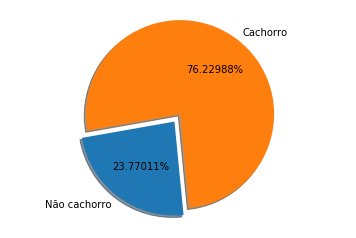

In [345]:
#Criando um gráfico de pizza para ajudar na vizualização
labels = 'Não cachorro', 'Cachorro'
sizes = [(df_tweets_master[df_tweets_master.p1_dog == False].shape[0])/(df_tweets_master.shape[0]), 1 - (df_tweets_master[df_tweets_master.p1_dog == False].shape[0])/(df_tweets_master.shape[0])]

pizza, ax1 = plt.subplots()
ax1.pie(sizes, explode= (0.1, 0), labels=labels,autopct='%1.5f%%', shadow=True, startangle=190)
ax1.axis('equal')

plt.show()

### Raças mais postadas

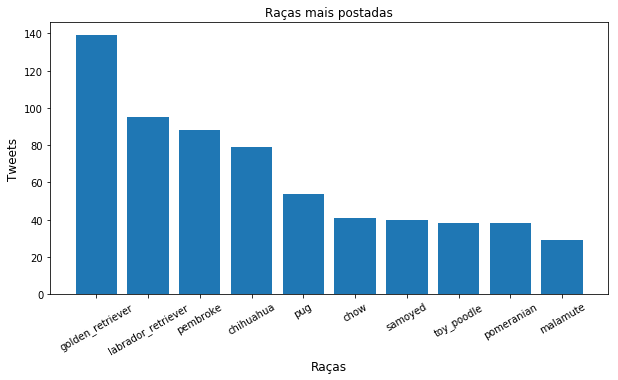

In [379]:
#Criando um gráfico de barras para ajudar na vizualização
dogs = {'golden_retriever':139,
'labrador_retriever':95,
'pembroke':88,
'chihuahua':79,
'pug':54,
'chow':41,
'samoyed':40,
'toy_poodle':38,
'pomeranian':38,
'malamute':29}

qt = list(dogs.values())
name = list(dogs.keys())

bar, ax = plt.subplots(figsize = (10, 5))
index = np.arange(len(label))
plt.bar(name, qt)
plt.xticks(name, fontsize = 10, rotation = 30)
plt.xlabel('Raças', fontsize = 12)
plt.ylabel('Tweets', fontsize = 12)
plt.title('Raças mais postadas')
plt.show()

### Média das notas dos cachorros

In [120]:
#Somando todas as notas dos cachorros e dividindo pelo número de avaliações para descobrir a média das notas
sum(df_tweets_clean.rating_numerator)/sum(df_tweets_clean.rating_numerator.shape)

13.215172413793104